In [5]:
import torch
import torch.nn.functional as F

dim = 4096

# 相似性度量

Hamming & cosine

In [2]:
def similarity(hv1, hv2, stype):
    if stype == 'cos':
        return F.cosine_similarity(hv1.float(), hv2.float(), dim=0)
    elif stype == 'ham':
        ham = hv1 ^ hv2
        return torch.sum(ham != 0)


In [3]:
v1 = torch.tensor([1, 1, 1]).to(torch.float)
v2 = torch.tensor(
    [[1, 1, 1],
     [1, -1, -1]]
).to(torch.float)
simi = F.cosine_similarity(v1, v2)
simi, torch.max(simi), torch.argmax(simi).dtype

(tensor([ 1.0000, -0.3333]), tensor(1.0000), torch.int64)

## 两种相似度量的关系

证明对于 bipolar {-1, 1} 来说，Hamming 和 cos 有线性关系
$$
cos(H_1, H_2) = 1 - 2/D_{hv} Hamming(H_1, H_2)
$$

In [6]:
vech1 = torch.randint(low=0, high=2, size=(dim, )) * 2 - 1
vech2 = torch.randint(low=0, high=2, size=(dim, )) * 2 - 1

cos_simi = similarity(vech1, vech2, stype='cos')
ham_simi = similarity(vech1, vech2, stype='ham')

cos_simi.item(), 1 - 2/dim * ham_simi.item(), ham_simi.item()

(0.0087890625, 0.0087890625, 2030)

## bipolar 和 binary

热力图表示相似度

In [7]:
number = 8
dimension = 1024
rand_vec = torch.randint(0, 2, (8, 1024)) * 2 - 1

In [8]:
F.cosine_similarity(rand_vec.float(), rand_vec.float(), dim=1)

tensor([1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
def inter_cos_simi(hvs1, hvs2, stype='cos'):

    """
    Function
    ===

    Parameter
    ---
    (n, dim) & (m, dim) vector

    Return
    ---
    matrix (n, m)
    """
    dot_product = torch.matmul(hvs1, hvs2.t())
    
    norms1 = torch.norm(hvs1, dim=1, keepdim=True)
    norms2 = torch.norm(hvs2, dim=1, keepdim=True)
    
    return dot_product / (norms1 @ norms2.t())


vec_simi = inter_cos_simi(rand_vec.float(), rand_vec.float(), stype='cos')

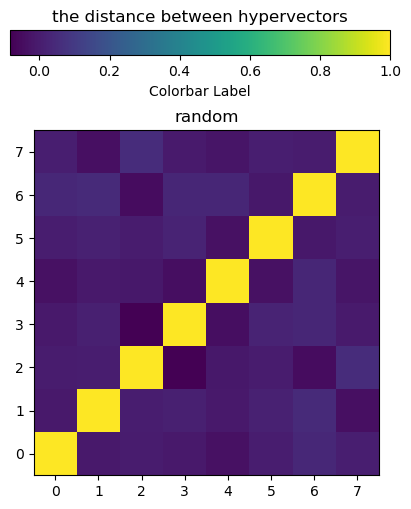

In [10]:
import matplotlib.pyplot as plt

# 创建一个图形窗口
fig, axs = plt.subplots(1, 1, figsize = (5, 5))

# 绘制第一个热力图
cax1 = axs.imshow(vec_simi, origin = 'lower', cmap = 'viridis')  # 'hot'是颜色映射，可以根据需要选择其他颜色映射
axs.set_title('random')


# 创建一个空的子图用于颜色条
cax = fig.add_axes([0.12, 0.95, 0.76, 0.05])  # [left, bottom, width, height]
# 添加颜色条
cbar = fig.colorbar(cax1, cax = cax, orientation='horizontal')

# 设置颜色条的位置
cbar.set_label('Colorbar Label')

# 调整子图之间的间距，为颜色条腾出空间
plt.subplots_adjust(top = 0.8)
plt.title("the distance between hypervectors")
plt.show()